In [1]:
import numpy as np
import random as rndm
from random import random as rnd
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from math import pi
from math import exp
import collections
%matplotlib inline

In [2]:
#Initialising transition energy
#Function to calculate epsilon for given temperatures

E = 1e-22
def epsilon(Tc, Th):
    return (np.tanh(E/(1.38064852e-23 * Tc)) - np.tanh(E/(1.38064852e-23 * Th)))/(1 - (np.tanh(E/(1.38064852e-23 * Th)))*(np.tanh(E/(1.38064852e-23 * Tc))))

In [3]:
#Function to calculate information entropy of a string

def entropy(str):
    str = list(str)
    length = len(str)
    int_str = [int(i) for i in str]
    ones1 = sum(int_str)
    p11 = ones1/length
    p10 = 1 - p11
    if p11 == 0 or p10 == 0:
        return 0
    ent1 = -p10*(np.log2(p10)) - p11*(np.log2(p11))
    return ent1
epsilon(100, 500)

0.05787902283909685

In [4]:
#Function to calculate heat transfer from cold reservoir to hot reservoir, and entropy difference between input and output strings
#input -> 
# delta-> determines the proportion of 0s and 1s in the input string
# ns -> length of input string
# nr -> number of iterations

def cal_heat(delta, ns, nr):
    Tc = 100
    Th = 500
    E = 1e-22
    
    beta_h = 1.38064852e-23 * Th
    beta_c = 1.38064852e-23 * Tc
    
    hot_d = 1/(1 + np.exp(-1*E/beta_h))
    hot_u = 1 - hot_d
    
    cold_d = 1/(1 + np.exp(-1*E/beta_c))
    cold_u = 1 - cold_d
    
    p0 = (1 + delta)/2
    p1 = (1 - delta)/2
    ones = int(p1*ns)
    
    heat = []
    ent = []

    for itr in range(nr):
        
        str = ['0' for l in range(ns)]
        onesloc = rndm.sample(range(ns), ones)
        for l in range(len(onesloc)):
            str[onesloc[l]] = '1'
            
        Q = 0
        
        str1 = ''.join(str)
        en1 = entropy(str1)
#         print(str1)
#         print(en1)
        
        state = 'd'
        for i in range(len(str)):
            if rnd() < hot_u:
                state = 'u'
            else:
                state = 'd'
            if state == 'd' and str[i] == '0':
                if rnd() < cold_u:
                    state = 'u'
                    str[i] = '1'
                    Q = Q + E
            elif state == 'u' and str[i] == '1':
                if rnd() < cold_d:
                    state = 'd'
                    str[i] = '0'
                    Q = Q - E
                    
        str2 = ''.join(str)
        en2 = entropy(str2)
#         print(str2)
#         print(en2)
        
        heat.append(Q)
        ent.append(en2 - en1)
        
    return heat, ent

In [5]:
x0, e0 = cal_heat(0, 6160, 10000)
x95, e95 = cal_heat(0.95, 6160, 1000)
x85, e85 = cal_heat(0.85, 6160, 1000)
x75, e75 = cal_heat(0.75, 6160, 1000)
x65, e65 = cal_heat(0.65, 6160, 1000)
x55, e55 = cal_heat(0.55, 6160, 1000)
x45, e45 = cal_heat(0.45, 6160, 1000)
x35, e35 = cal_heat(0.35, 6160, 1000)
x25, e25 = cal_heat(0.25, 6160, 1000)
x15, e15 = cal_heat(0.15, 6160, 1000)
x100, e100 = cal_heat(1, 6160, 1000)
x_15, e_15 = cal_heat(-0.15, 6160, 1000)
x05, e05 = cal_heat(0.05, 6160, 1000)
x10, e10 = cal_heat(0.1, 6160, 1000)
# cal_heat(0, 600, 1)

In [6]:
x0_freq = {}
for i in range(len(x0)):
    if x0[i] in x0_freq:
        x0_freq[x0[i]] += 1
    else:
        x0_freq[x0[i]] = 1
x0_f = collections.OrderedDict(sorted(x0_freq.items()))


In [7]:
#Function to calculate Normal distribution for given mean, standard deviation and input range

def norm(x, mu, std):
    y = []
    for i in range(x.size):
#         print(x[i])
        val = 1.0 / (std * (2.0 * pi)**(1/2)) * exp(-1.0 * (x[i] - mu)**2 / (2.0 * (std**2)))
        y.append(val)
        
    y = np.array(y)
    return y

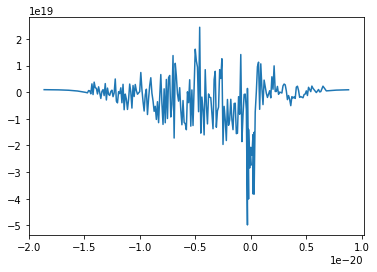

In [8]:
#Visualising variation between expected and observed heat-transfers frequencies

X = list(set(x0))
X.sort()
X = np.array(X)
xy = []
yy = []
yy = norm(X, np.mean(x0), np.std(x0))
xy = [x0_freq[i] for i in x0_f.keys()]
xy = np.array(xy)
xy = xy*(1.16e20 / 120)
Y = xy - yy
sns.lineplot(x = X, y = Y)

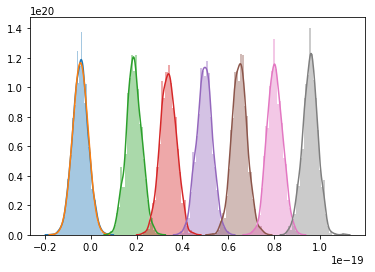

In [24]:
#Visualising heat-transfers

fig, ax = plt.subplots() 
sns.distplot(x0) 
sns.lineplot(x = X, y = yy)
sns.distplot(x15) 
sns.distplot(x25) 
sns.distplot(x35) 
sns.distplot(x45) 
sns.distplot(x55) 
sns.distplot(x65) 
# sns.distplot(x75) 
# sns.distplot(x85) 
# sns.distplot(x95) 
# sns.distplot(x100) 
# sns.distplot(x_15)

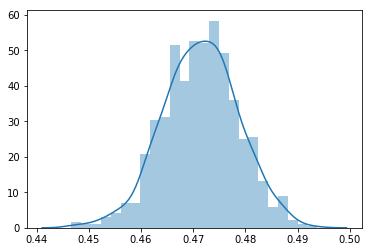

In [26]:
# sns.distplot(e0) 
# sns.lineplot(x = X, y = yy)
# sns.distplot(e15) 
# sns.distplot(e25) 
# sns.distplot(e35) 
# sns.distplot(e45) 
# sns.distplot(e55) 
# sns.distplot(e65) 
# sns.distplot(e75) 
sns.distplot(e85) 
# sns.distplot(e95) 
# sns.distplot(e100) 
# sns.distplot(e_15)

In [32]:
#Calculating means, standard-deviations of heat and entropies

mean = [np.mean(x_15), np.mean(x05), np.mean(x10), np.mean(x15), np.mean(x25), 
       np.mean(x35), np.mean(x45), np.mean(x55), 
       np.mean(x65), np.mean(x75), np.mean(x85), 
       np.mean(x95), np.mean(x100)]
std = [np.std(x_15), np.std(x05), np.std(x10), np.std(x15), np.std(x25), 
       np.std(x35), np.std(x45), np.std(x55), 
       np.std(x65), np.std(x75), np.std(x85), 
       np.std(x95), np.std(x100)]
e_mean = [np.mean(e_15), np.mean(e05), np.mean(e10), np.mean(e15), np.mean(e25), 
       np.mean(e35), np.mean(e45), np.mean(e55), 
       np.mean(e65), np.mean(e75), np.mean(e85), 
       np.mean(e95), np.mean(e100)]
ref = [-0.15, 0.05, 0.1, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1]

mean = np.array(mean)
std = np.array(std)
ref = np.array(ref)
e_mean = np.array(e_mean)
# ref = (ref - epsilon(100, 500))/2
std = std/E*6160
e_mean, mean

(array([1.35240470e-02, 5.87490707e-04, 4.03861596e-03, 1.04936417e-02,
        3.12755754e-02, 6.42913972e-02, 1.09664141e-01, 1.69720937e-01,
        2.46272895e-01, 3.44063649e-01, 4.71424494e-01, 6.50721234e-01,
        7.98755606e-01]),
 array([-2.760350e-20,  3.229000e-21,  1.063310e-20,  1.880990e-20,
         3.386220e-20,  4.963410e-20,  6.490770e-20,  8.036800e-20,
         9.575620e-20,  1.110958e-19,  1.264553e-19,  1.418375e-19,
         1.492668e-19]))

(array([1.61205588e-02, 2.83756162e-04, 3.03841782e-03, 8.72429628e-03,
        2.80903416e-02, 5.96225861e-02, 1.03558625e-01, 1.62161155e-01,
        2.37265627e-01, 3.33613469e-01, 4.59529529e-01, 6.37379349e-01,
        7.84714887e-01]),
 array([-0.15,  0.05,  0.1 ,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,
         0.75,  0.85,  0.95,  1.  ]))

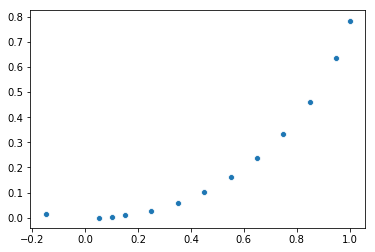

In [42]:
#Plotting relationship between delta and total entropy(information and thermodynamic)

Tc = 100
Th = 500
E = 1e-22

beta_h = 1.38064852e-23 * Th
beta_c = 1.38064852e-23 * Tc
div = []
for i in range(mean.size):
    div.append(mean[i]/e_mean[i])
div = np.array(div)
lhs = -1*div*((1/beta_h) - (1/beta_c))/6160
sns.scatterplot(x = ref, y = mean*(1/beta_h - 1/beta_c)/6160 + e_mean)
(mean*(1/beta_h - 1/beta_c)/6160 + e_mean), ref

In [43]:
ref.size, std.size

(13, 13)

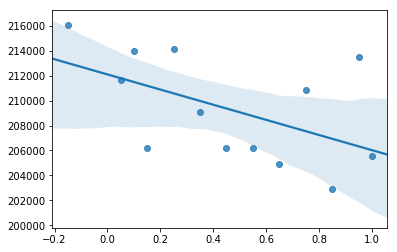

In [44]:

sns.regplot(x = ref, y = std)

In [45]:
y50_100 = cal_heat(0.5, 100, 1000)[0]
y50_500 = cal_heat(0.5, 500, 1000)[0]
y50_1000 = cal_heat(0.5, 1000, 1000)[0]
y50_1500 = cal_heat(0.5, 1500, 1000)[0]
y50_2000 = cal_heat(0.5, 2000, 1000)[0]
y50_2500 = cal_heat(0.5, 2500, 1000)[0]
# y50_10 = cal_heat(0.5, 10000, 10000)

In [46]:
meany = [np.mean(y50_100), np.mean(y50_500), np.mean(y50_1000), 
        np.mean(y50_1500), np.mean(y50_2000), np.mean(y50_2500)]
refy = [1, 5, 10, 15, 20, 25]
meany = np.array(meany)
meany = meany/E
refy = np.array(refy)

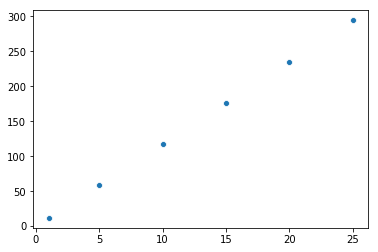

In [47]:
sns.scatterplot(x = refy, y = meany)